In [59]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import random

import numpy
import skimage.io
import scipy.sparse
import tqdm
import math

In [2]:
NEURONS = 300
MODIFIER = 5

In [3]:
data = []
row = []
col = []
for i in tqdm.tqdm(range(NEURONS)):
    for j in range(NEURONS):
        if i != j:
            if numpy.random.binomial(1, math.exp(-(abs(i - j) - 1) / MODIFIER)):
                data.append(numpy.random.uniform(-1, 1))
                row.append(i)
                col.append(j)
data = numpy.array(data)
row = numpy.array(row)
col = numpy.array(col)

100%|██████████| 300/300 [00:00<00:00, 2340.64it/s]


In [4]:
matrix = scipy.sparse.csr_matrix((data, (row, col)), shape=(NEURONS, NEURONS))

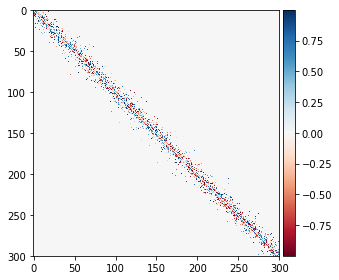

In [7]:
skimage.io.imshow(matrix.toarray())

In [8]:
probabilities = numpy.zeros((NEURONS, NEURONS))

In [9]:
probabilities.nbytes

720000

In [10]:
for i in range(NEURONS):
    for j in range(NEURONS):
        if i != j:
            probabilities[i, j] = 1 / abs(i - j)

In [11]:
probabilities

array([[0.        , 1.        , 0.5       , ..., 0.003367  , 0.0033557 ,
        0.00334448],
       [1.        , 0.        , 1.        , ..., 0.00337838, 0.003367  ,
        0.0033557 ],
       [0.5       , 1.        , 0.        , ..., 0.00338983, 0.00337838,
        0.003367  ],
       ...,
       [0.003367  , 0.00337838, 0.00338983, ..., 0.        , 1.        ,
        0.5       ],
       [0.0033557 , 0.003367  , 0.00337838, ..., 1.        , 0.        ,
        1.        ],
       [0.00334448, 0.0033557 , 0.003367  , ..., 0.5       , 1.        ,
        0.        ]])

In [12]:
connections = numpy.random.binomial(1, probabilities, (NEURONS, NEURONS))

In [13]:
connections

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


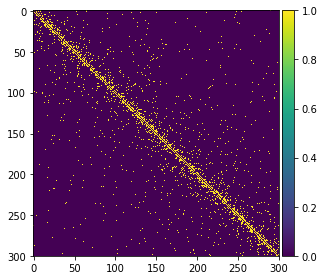

In [14]:
skimage.io.imshow(connections)

In [15]:
numpy.count_nonzero(connections)

3235

In [22]:
test = scipy.sparse.random(300, 300, density=0.1)

In [27]:
test2 = numpy.random.uniform(-1, 1, (300, 300))

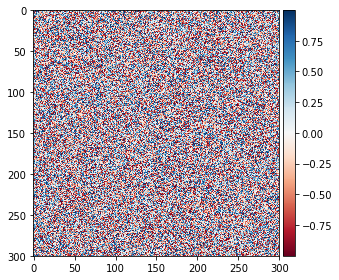

In [28]:
skimage.io.imshow(test2)

In [30]:
final = test.toarray() * test2

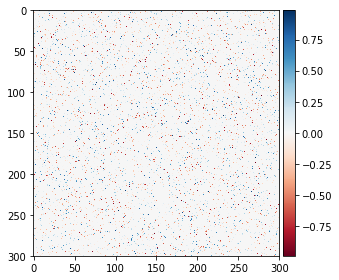

In [31]:
skimage.io.imshow(final)

In [32]:
numpy.count_nonzero(final)

9000

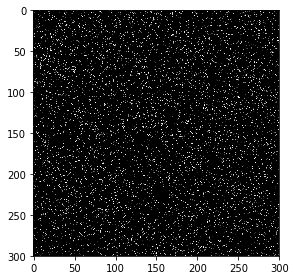

In [33]:
skimage.io.imshow(test.toarray())

In [34]:
rand1 = numpy.random.uniform(-1, 1, (300, 300))
rand2 = numpy.random.uniform(-1, 1, (300, 300))

In [39]:
cool = connections * rand1 * rand2

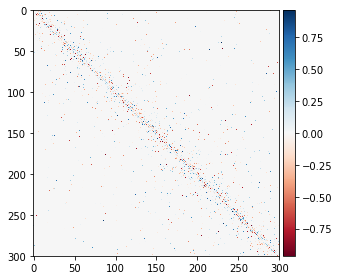

In [40]:
skimage.io.imshow(cool)

In [51]:
coords = 

In [58]:
numpy.vectorize(lambda i, j: 1 / abs(i - j) if i != j else 0., signature='(),()->()')(*numpy.meshgrid(range(10), range(10)))

array([[0.        , 1.        , 0.5       , 0.33333333, 0.25      ,
        0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111],
       [1.        , 0.        , 1.        , 0.5       , 0.33333333,
        0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.5       , 1.        , 0.        , 1.        , 0.5       ,
        0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.33333333, 0.5       , 1.        , 0.        , 1.        ,
        0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.33333333, 0.5       , 1.        , 0.        ,
        1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.2       , 0.25      , 0.33333333, 0.5       , 1.        ,
        0.        , 1.        , 0.5       , 0.33333333, 0.25      ],
       [0.16666667, 0.2       , 0.25      , 0.33333333, 0.5       ,
        1.        , 0.        , 1.        , 0.5       , 0.33333333],
       [0.14285714, 0.16666667, 0.2      

In [81]:
def generate_connections(neurons):
    probabilities = numpy.vectorize(lambda i, j: 1 / abs(i - j) if i != j else 0.)(*numpy.meshgrid(range(neurons), range(neurons)))
    mask = numpy.random.binomial(1, probabilities, (neurons, neurons))
    multiplicand = numpy.random.uniform(-1, 1, (neurons, neurons))
    multiplier = numpy.random.uniform(0, 1, (neurons, neurons))
    connections = mask * multiplicand * multiplier
    return connections

In [93]:
W = generate_connections(1000)

In [94]:
W.shape

(1000, 1000)

In [95]:
W.nbytes

8000000

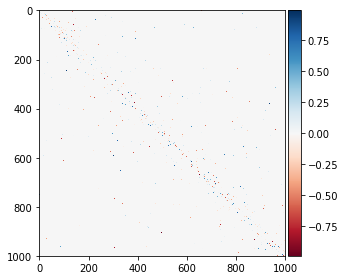

In [96]:
skimage.io.imshow(W)

In [97]:
numpy.count_nonzero(W) / W.size

0.012918

In [100]:
numpy.count_nonzero(W)

12918